In [ ]:
!pip install numpy pandas matplotlib scikit-learn torch sentence_transformers

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=9812203d04e779f761b133de41a6abd85f3dc7d633452c398c5639d00236b9a1
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!python main.py

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from typing import List
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("./dataset.csv")
df['label'] = df['text_type'].map({'spam': 1, 'ham': 0})
df['text'] = df['text'].map(lambda x: str(x)).astype('string')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from typing import List
from sbert import preprocess
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


def load_spam():
    df = pd.read_csv("./spam.csv", encoding='latin-1')

    df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
    df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
    df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})

    X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
    return list(X), list(y)


def load_spam2():
    df = pd.read_csv("./spam2.csv", encoding='latin-1')

    X = np.asanyarray((df['Subject'] + " " + df['Message']).map(lambda x: str(x).strip()).astype("string"))
    y = np.asanyarray(df['Spam/Ham'].map({'ham': 0, 'spam': 1}).astype("int32"))
    return list(X), list(y)

def load_spam3():
    df_test = pd.read_parquet("./test3.parquet")
    df_train = pd.read_parquet("./train3.parquet")

    df = pd.concat([df_test, df_train], ignore_index=True, sort=False)
    df['label'] = df['label'].map({'spam': 1, 'not_spam': 0})
    df['text'] = df['text'].map(lambda x: str(x)).astype('string')
    return list(df['text']), list(df['label'])

def load_spam4():
    df = pd.read_csv("./spam4.csv")
    df['label'] = df['text_type'].map({'spam': 1, 'ham': 0})
    df['text'] = df['text'].map(lambda x: str(x)).astype('string')
    return list(df['text']), list(df['label'])

def run(text: List[str], labels):
    print("Stage 1")
    train_embeddings = preprocess(sentences=list(text))

    print("Stage 2")
    X_train, X_test, y_train, y_test = train_test_split(
        train_embeddings,
        labels,
        test_size=0.2,
        random_state=42
    )

    print("Stage 3")
    baseline_model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
    baseline_model.fit(X_train, y_train)

    print("Stage 4")
    predictions = baseline_model.predict(X_test)
    nb_accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", nb_accuracy)
    print(classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions, labels=baseline_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=baseline_model.classes_)
    disp.plot()
    return baseline_model

Stage 1


Batches:   0%|          | 0/318 [00:00<?, ?it/s]

Stage 2
Stage 3
Stage 4
Accuracy: 0.831941031941032
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2913
           1       0.99      0.41      0.58      1157

    accuracy                           0.83      4070
   macro avg       0.90      0.71      0.74      4070
weighted avg       0.86      0.83      0.81      4070



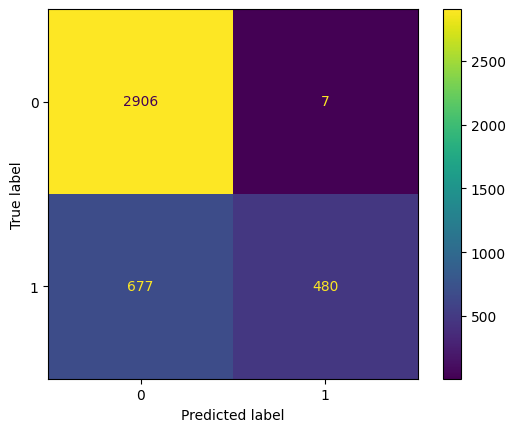

In [ ]:
text1, label1 = load_spam4()
model4 = run(text1, label1)

In [ ]:
#1, 1, 0, 0, 0, 1, 0, 1
messages = [
    "Congratulations! You've won a free cruise. Click here to claim your prize!",
    "URGENT: Your account is at risk. Please update your password immediately.",
    "Reminder: Your appointment with Dr. Smith is scheduled for Thursday at 3 PM.",
    "This is just a friendly message to check in on you.",
    "I wanted to remind you about our meeting tomorrow at 10 AM.",
    "Claim your prize by clicking the link. Limited time offer!",
    "Here's the document you requested. Let me know if you need anything else.",
    "You've been chosen for a free iPhone! Click to claim it now."
]

t = preprocess(sentences=messages)
list(model2.predict(t))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[1, 1, 0, 1, 0, 1, 0, 1]

In [ ]:
test = pd.read_parquet('./test3.parquet')
train = pd.read_parquet('./train3.parquet')

In [ ]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our',
			'ours', 'ourselves', 'you', 'your', 'yours',
			'yourself', 'yourselves', 'he', 'him', 'his',
			'himself', 'she', 'her', 'hers', 'herself',
			'it', 'its', 'itself', 'they', 'them', 'their',
			'theirs', 'themselves', 'what', 'which', 'who',
			'whom', 'this', 'that', 'these', 'those', 'am',
			'is', 'are', 'was', 'were', 'be', 'been', 'being',
			'have', 'has', 'had', 'having', 'do', 'does', 'did',
			'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or',
			'because', 'as', 'until', 'while', 'of', 'at',
			'by', 'for', 'with', 'about', 'against', 'between',
			'into', 'through', 'during', 'before', 'after',
			'above', 'below', 'to', 'from', 'up', 'down', 'in',
			'out', 'on', 'off', 'over', 'under', 'again',
			'further', 'then', 'once', 'here', 'there', 'when',
			'where', 'why', 'how', 'all', 'any', 'both', 'each',
			'few', 'more', 'most', 'other', 'some', 'such', 'no',
			'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
			'very', 's', 't', 'can', 'will', 'just', 'don',
			'should', 'now', '']

In [ ]:
def print_unique(series):
  shape = series.unique().shape
  print("> Non-unique messages:", series.shape[0] - shape[0] )
  print("> Unique messages:", shape[0] )

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def print_top_n_words(series, c=1, n=None):
  common_words = None
  if c == 1:
    print("> Unigrams frequency:")
    common_words = get_top_n_words(series, n)
  elif c == 2:
    print("> Bigram frequency:")
    common_words = get_top_n_bigram(series, n)

  for word, freq in common_words:
      print(word, freq)

def print_len(series):
  lengths = series.map(lambda x: len(x))
  print("> Average Length: ", lengths.mean())
  print("> Min Length: ", lengths.min())
  print("> Max Length: ", lengths.max())
  plt.boxplot(x=lengths)
  plt.show()

def remove_stop_words(text):
  pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, stop_words)) + r')\b', re.IGNORECASE)
  return pattern.sub('', text)

def check(df, mes_name):
  print("> Rows:", df.shape[0])
  df = df.dropna()
  print("> Non-null:", df.shape[0])
  messages = df[mes_name]

  print("[ Before removing stop words ]")
  print_len(messages)
  print_unique(messages)
  print_top_n_words(messages, 1, 10)
  print_top_n_words(messages, 2, 10)

  messages = messages.map(remove_stop_words)
  print("\n[ After removing stop words ]")
  print_len(messages)
  print_unique(messages)
  print_top_n_words(messages, 1, 10)
  print_top_n_words(messages, 2, 10)

> Rows: 33716
> Non-null: 33107
[ Before removing stop words ]
> Average Length:  1489.8268039991542
> Min Length:  1
> Max Length:  228353


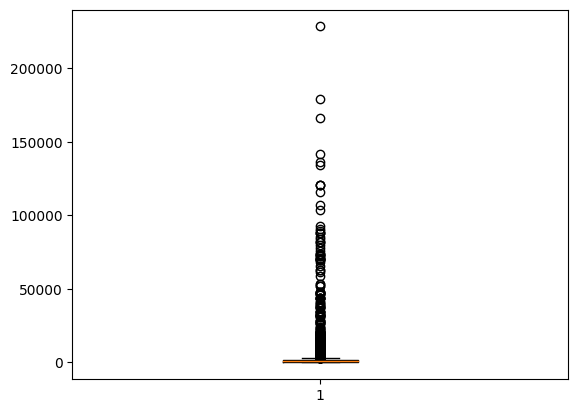

> Non-unique messages: 3525
> Unique messages: 29582
> Unigrams frequency:
the 288201
to 210184
and 155433
of 146821
in 105450
for 80687
you 79811
is 70653
this 63073
enron 59775
> Bigram frequency:
of the 30859
in the 24381
hou ect 16212
ect ect 15757
to the 13252
on the 12668
if you 12626
for the 12254
will be 11452
the company 10309

[ After removing stop words ]
> Average Length:  1259.8871537741263
> Min Length:  0
> Max Length:  191068


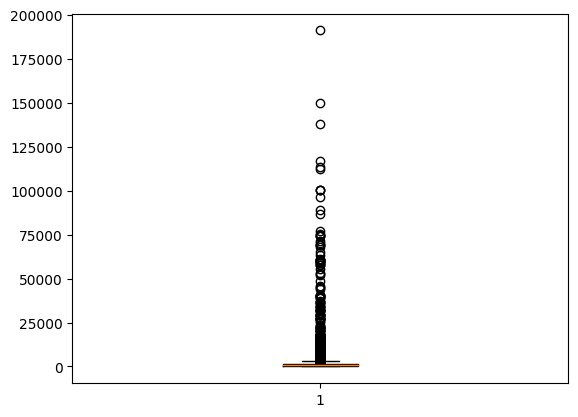

> Non-unique messages: 3525
> Unique messages: 29582
> Unigrams frequency:
enron 59775
ect 35338
com 23843
company 22787
please 20102
hou 17263
would 15452
2001 15229
new 14337
10 14128
> Bigram frequency:
hou ect 16212
ect ect 15764
enron enron 6239
http www 5231
enron com 4417
let know 4165
vince kaminski 4072
cc subject 4070
original message 4053
subject re 3802


In [ ]:
#30k rows
df = pd.read_csv('./spam2.csv')
check(df, "Message")

> Rows: 5572
> Non-null: 5572
[ Before removing stop words ]
> Average Length:  80.11880832735105
> Min Length:  2
> Max Length:  910


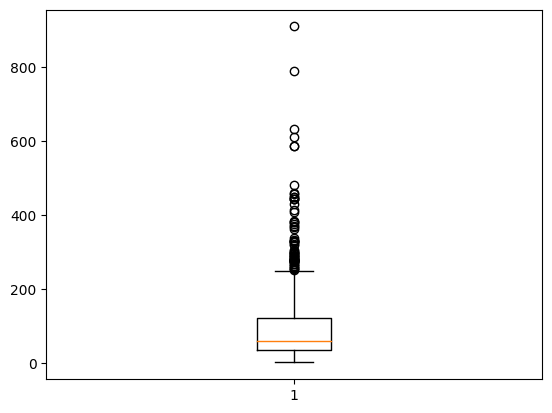

> Non-unique messages: 403
> Unique messages: 5169
> Unigrams frequency:
to 2242
you 2240
the 1328
and 979
in 898
is 890
me 802
my 762
it 744
for 704
> Bigram frequency:
lt gt 276
are you 180
you are 129
you have 118
do you 109
if you 104
in the 99
want to 86
will be 83
to be 83

[ After removing stop words ]
> Average Length:  63.55061019382627
> Min Length:  2
> Max Length:  579


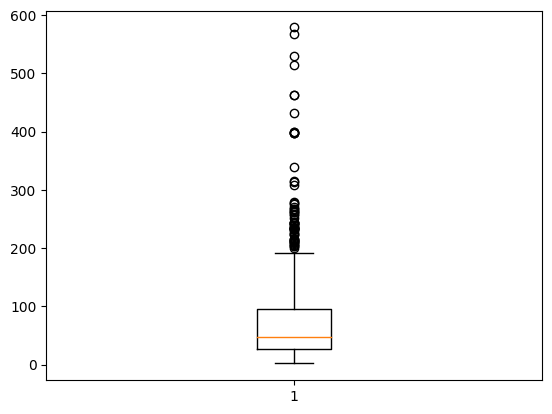

> Non-unique messages: 404
> Unique messages: 5168
> Unigrams frequency:
call 591
get 391
ur 385
gt 318
lt 316
ok 292
free 284
go 280
ll 269
know 261
> Bigram frequency:
lt gt 276
please call 55
call later 50
co uk 49
ll call 45
let know 40
sorry ll 39
take care 37
good morning 32
po box 25


In [ ]:
#5k rows
df = pd.read_csv('./spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
check(df, "v2")

> Rows: 10900
> Non-null: 10900
[ Before removing stop words ]
> Average Length:  372.9164220183486
> Min Length:  1
> Max Length:  41544


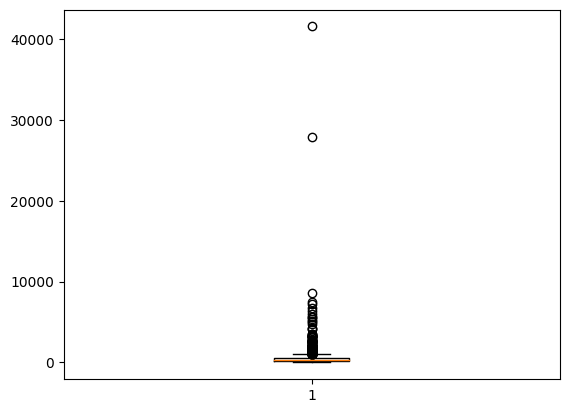

> Non-unique messages: 238
> Unique messages: 10662
> Unigrams frequency:
the 20275
to 19262
and 17583
you 14606
of 12511
for 10554
in 7410
on 7267
that 7218
your 6810
> Bigram frequency:
looking for 1984
we ve 1663
want to 1555
of the 1543
ve got 1540
you can 1480
on the 1328
are you 1299
in the 1271
miss out 1207

[ After removing stop words ]
> Average Length:  294.1715596330275
> Min Length:  1
> Max Length:  41021


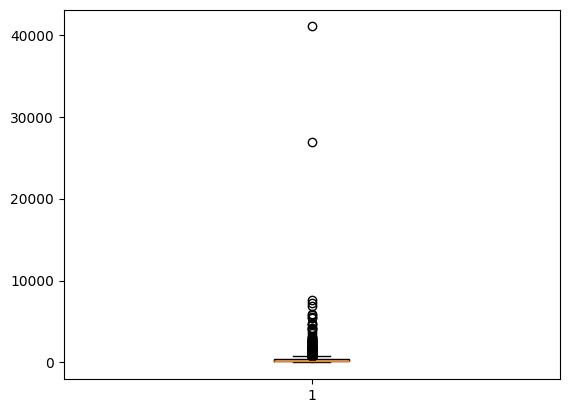

> Non-unique messages: 238
> Unique messages: 10662
> Unigrams frequency:
data 5840
get 4340
dataset 3257
https 2873
ve 2818
like 2780
looking 2476
time 2458
amp 2403
amazing 2365
> Bigram frequency:
ve got 1541
https www 1159
social media 1075
get rich 879
rich quick 836
social network 820
limited time 610
get ready 608
amp x200b 604
anyone know 512


In [ ]:
#8k rows
test = pd.read_parquet('./test3.parquet')
train = pd.read_parquet('./train3.parquet')
df = pd.concat([test, train], ignore_index=True, sort=False)
check(df, "text")

> Rows: 20348
> Non-null: 20348
[ Before removing stop words ]
> Average Length:  326.84637310792215
> Min Length:  1
> Max Length:  2584


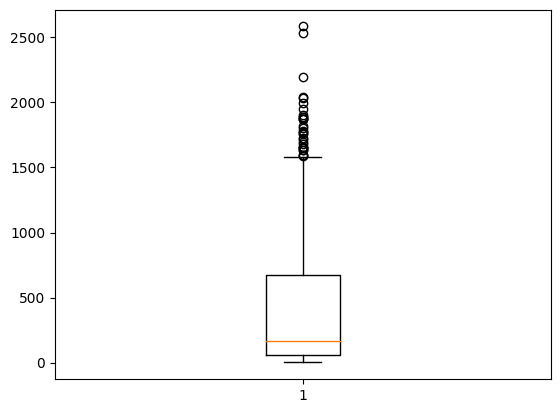

> Non-unique messages: 14
> Unique messages: 20334
> Unigrams frequency:
the 33688
to 31171
and 18672
you 16617
1635465 15636
of 15198
in 12866
for 12661
is 11163
on 10394
> Bigram frequency:
1635465 1635465 7389
hou ect 3142
of the 2916
ect ect 2772
in the 2534
vince kaminski 2522
if you 1914
for the 1680
on the 1650
to the 1548

[ After removing stop words ]
> Average Length:  272.2508846078239
> Min Length:  0
> Max Length:  2584


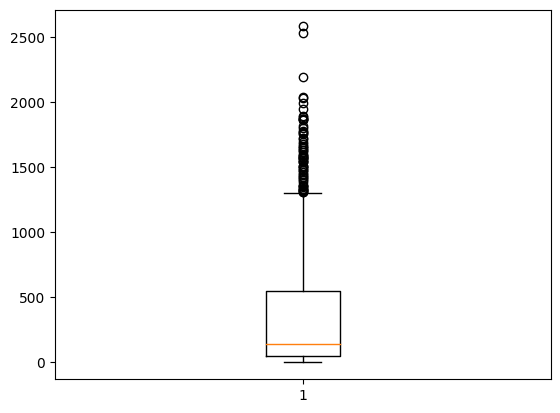

> Non-unique messages: 29
> Unique messages: 20319
> Unigrams frequency:
1635465 15636
ect 6632
enron 6050
vince 5568
url 4937
hou 3289
please 2961
kaminski 2929
com 2872
2000 2841
> Bigram frequency:
1635465 1635465 7778
hou ect 3142
ect ect 2775
vince kaminski 2522
cc subject 1271
kaminski hou 1223
enron com 1164
ect cc 1044
url url 941
would like 788


In [ ]:
#20k rows
df = pd.read_csv('./spam4.csv', encoding='latin-1')
check(df, "text")